# **Ensemble Models and Neural Networks: Customer Churn Prediction**

## **Author: Kattya Contreras Valdés**  
International Trade Engineer | Data Science  
Power BI | Python | SQL | Statistical Models | Machine Learning | Neural Networks  
Santiago, Chile



# 🧠 **Customer Churn Prediction**

[![Python](https://img.shields.io/badge/Python-3.11-blue?logo=python)](https://www.python.org/)
[![scikit-learn](https://img.shields.io/badge/scikit--learn-1.3-orange?logo=scikit-learn)](https://scikit-learn.org/)
[![License](https://img.shields.io/badge/license-MIT-green)]()

This project aims to **predict the probability of customer churn** in a telecommunications company, applying **supervised Machine Learning** techniques as part of the module *Ensemble Models and Neural Networks*.

The analysis focuses on identifying the key factors that influence **customer retention and attrition**, developing a **robust, balanced, and optimized** predictive model to support strategic decision-making in customer management.

---

## 🎯 **Methodological Approach**

The analytical process is structured in the following stages:

1. **Exploratory Data Analysis (EDA)**  
   - Review of variables, missing values, and correlations.  
   - Visualization of behavioral patterns and customer segments.

2. **Preprocessing and Class Balancing (SMOTE)**  
   - Addressing class imbalance between churned and retained customers.  
   - Normalization of numerical variables.

3. **Predictive Modeling (Ensemble and Supervised ML)**  
   - Implementation and comparison of models such as **Decision Tree**, **Bagging**, and **Random Forest**.  
   - Hyperparameter tuning using **GridSearchCV** to maximize performance.

4. **Model Evaluation**  
   - Metrics used: **F1-Score**, **ROC-AUC**, **OOB Score**.  
   - Analysis of the most influential features in predicting customer churn.

5. **First Neural Network Layer (MLP)** 🧩  
   - A simple **Multi-Layer Perceptron** was trained using `MLPClassifier` from scikit-learn.  
   - This model provides a baseline for comparison with ensemble methods and introduces a deep learning perspective.

---

## 🧠 **Technologies and Libraries**

- **Python 3.11**
- **pandas**, **numpy** → data manipulation and analysis  
- **matplotlib**, **seaborn** → data visualization  
- **scikit-learn** → modeling, metrics, and optimization  
- **imbalanced-learn (SMOTE)** → class balancing  
- **joblib** → model persistence

---

## 📈 **Key Results**

| Model | Main Parameters | F1-Score (Test) | ROC-AUC | OOB Score |
|:------|:----------------|:----------------|:---------|:-----------|
| **Random Forest** | {'max_features': 'sqrt', 'n_estimators': 170} | 0.657 | 0.881 | 0.938 |
| **MLP Neural Network** | hidden_layer_sizes=(32,), activation='relu', solver='adam' | 0.642 | 0.864 | — |

The **Random Forest** model demonstrated **high generalization and stability**, effectively identifying customers at higher churn risk and explaining the most important predictive features.

---

## 🧩 **Example: First Neural Network Layer**

```python
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Simple Neural Network (1 hidden layer with 32 neurons)
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Evaluate model
y_pred = mlp.predict(X_test)
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


**📦 Library Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.base import clone
from collections import Counter, defaultdict
import joblib


**Dataset loading**


In [2]:
import pandas as pd

# Parámetros
RSTATE = 42
DATA_PATH = "telecom_churn.csv"

# Cargar dataset
df = pd.read_csv(DATA_PATH)

# Verificaciones
print("Shape:", df.shape)
display(df.head())
print(df.describe().T)

# Distribución target
print("Churn distribution (%)")
print(df['Churn'].value_counts(normalize=True))

Shape: (3333, 11)


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


                  count        mean        std   min     25%     50%     75%  \
Churn            3333.0    0.144914   0.352067   0.0    0.00    0.00    0.00   
AccountWeeks     3333.0  101.064806  39.822106   1.0   74.00  101.00  127.00   
ContractRenewal  3333.0    0.903090   0.295879   0.0    1.00    1.00    1.00   
DataPlan         3333.0    0.276628   0.447398   0.0    0.00    0.00    1.00   
DataUsage        3333.0    0.816475   1.272668   0.0    0.00    0.00    1.78   
CustServCalls    3333.0    1.562856   1.315491   0.0    1.00    1.00    2.00   
DayMins          3333.0  179.775098  54.467389   0.0  143.70  179.40  216.40   
DayCalls         3333.0  100.435644  20.069084   0.0   87.00  101.00  114.00   
MonthlyCharge    3333.0   56.305161  16.426032  14.0   45.00   53.50   66.20   
OverageFee       3333.0   10.051488   2.535712   0.0    8.33   10.07   11.77   
RoamMins         3333.0   10.237294   2.791840   0.0    8.50   10.30   12.10   

                    max  
Churn        

**Most customers keep their contracts (≈90%), and only about 14.5% churn. The most relevant factors for predicting churn are contract renewal, number of customer service calls, and monthly charges. Variable usage of minutes and data is also observed, as well as a class imbalance, which justifies applying balancing techniques in the predictive models.**


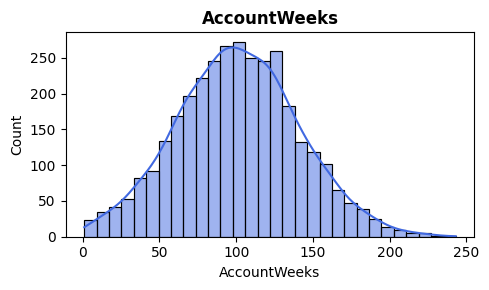

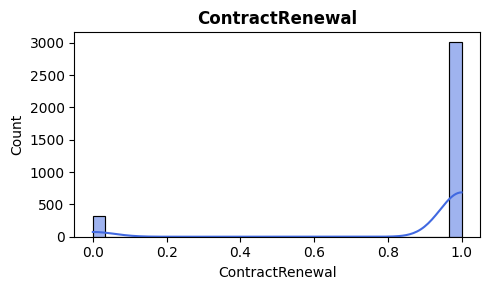

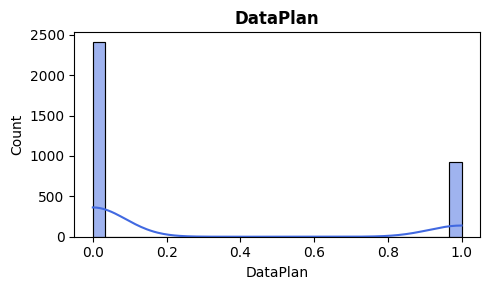

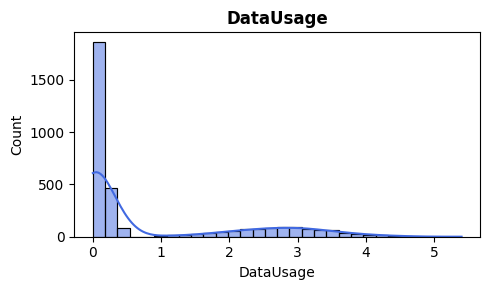

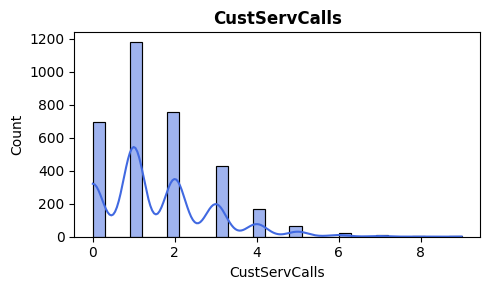

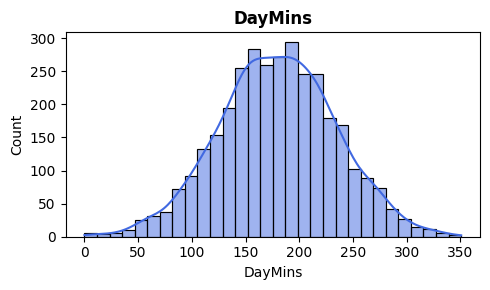

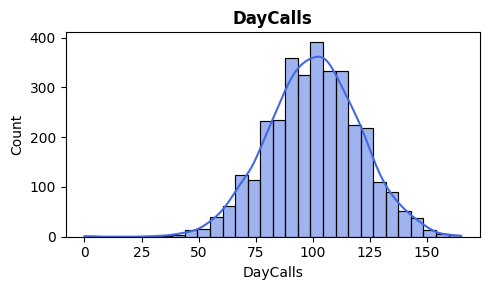

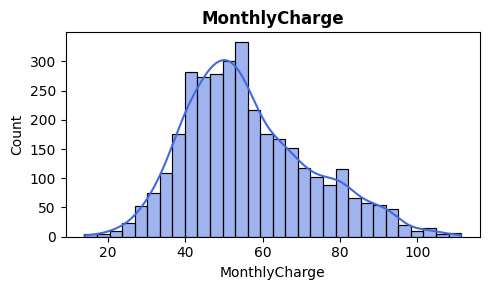

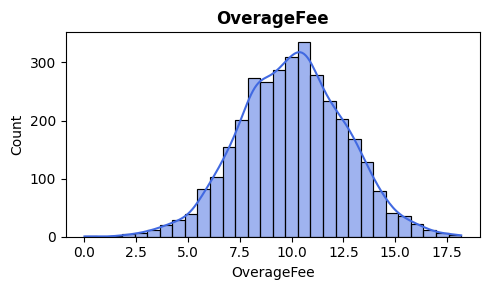

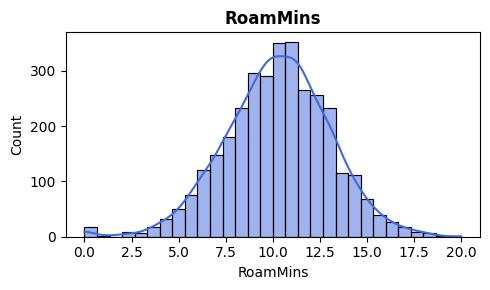

In [3]:
# Histogram of the different variables

import seaborn as sns

for col in df.columns.drop('Churn'):
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=30, kde=True, color='royalblue')
    plt.title(col, fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()


**Summary interpretation of the correlation map**

The correlation confirms the key factors: not renewing the contract and higher interaction with customer service are associated with a higher churn risk, while monthly charges and minutes/data usage show a moderate effect. The map also highlights relationships between predictors, which is useful for feature selection and improving model efficiency.


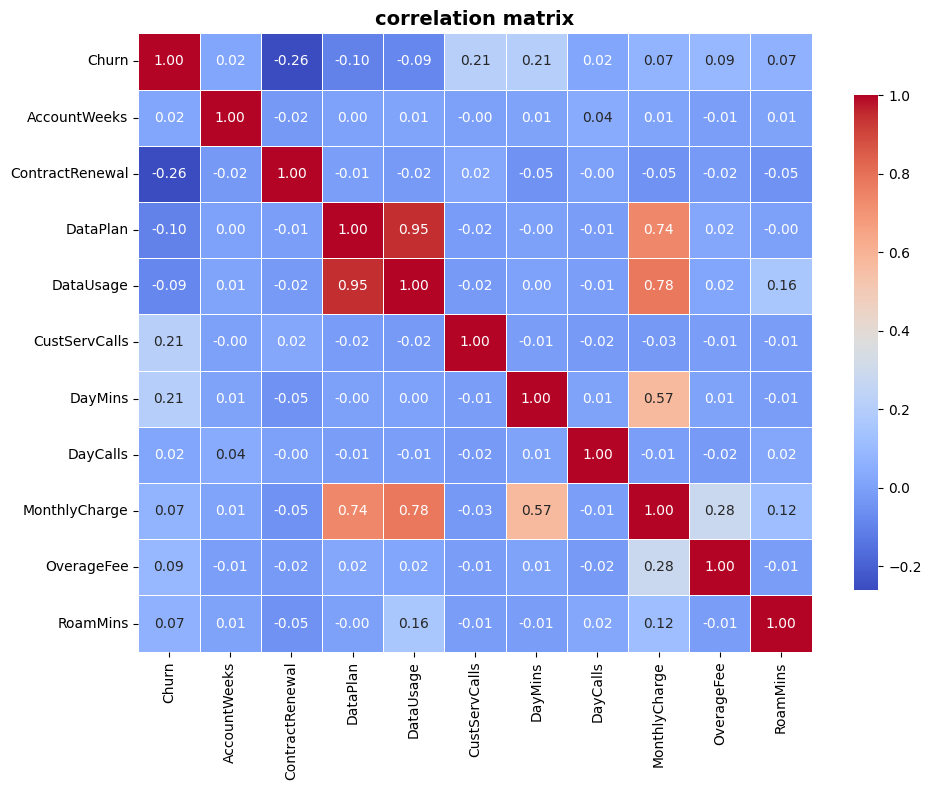

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), 
            cmap='coolwarm', 
            annot=True, 
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("correlation matrix", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


**Interpretation of the correlation map**

The correlation confirms the key factors: not renewing the contract and higher interaction with customer service are associated with a higher risk of churn, while monthly charges and usage of minutes/data have a moderate effect. The map also highlights relationships between predictors, which is useful for feature selection and improving model efficiency.


In [5]:
#2. Split 
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RSTATE, stratify=y)
print(X_train.shape, X_test.shape)

(2233, 10) (1100, 10)


In [6]:
# 3. Baseline Tree
dt = DecisionTreeClassifier(random_state=RSTATE)
dt.fit(X_train, y_train)
print("Decision Tree baseline - Train F1:", f1_score(y_train, dt.predict(X_train)))
print("Decision Tree baseline - Test F1:", f1_score(y_test, dt.predict(X_test)))
print("ROC-AUC Test:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))


Decision Tree baseline - Train F1: 1.0
Decision Tree baseline - Test F1: 0.6089743589743589
ROC-AUC Test: 0.7679238599375748


**Interpretation: F1 on training (1.0): the model perfectly learned the training data → overfitting is present.**

**F1 on test (0.61): performance drops significantly on new data → confirms overfitting, the model does not generalize well.**

**ROC-AUC (0.77): indicates a moderate ability to discriminate between classes (better than random, which would be 0.5, but far from optimal).**

**In summary: the decision tree is memorizing the training data, does not generalize well, and it is recommended to apply regularization or use ensemble methods.**


Best DT params: {'class_weight': None, 'max_depth': 10, 'min_samples_split': 0.01}
DT best - Train F1: 0.8172757475083057
DT best - Test F1: 0.6759581881533101
DT best - ROC-AUC Test: 0.8140677320393801


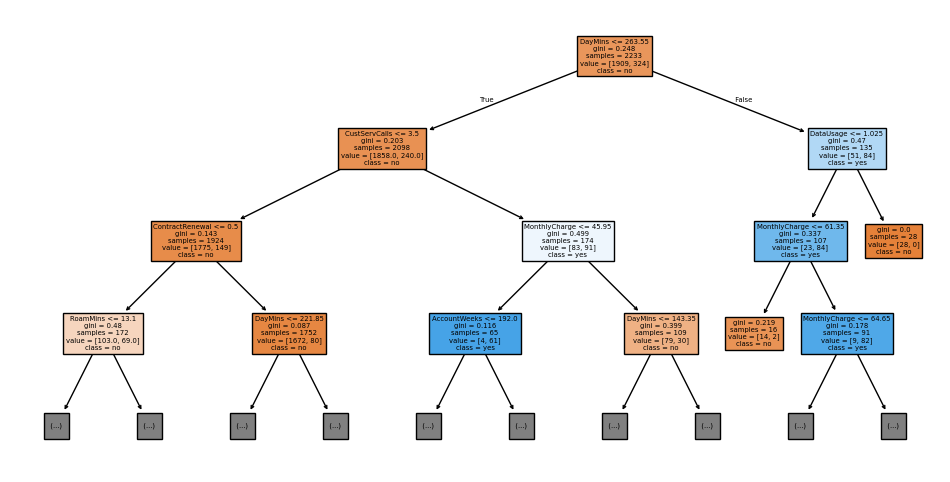

In [7]:
# 4. GridSearch DecisionTree (to avoid overfitting)
param_grid_dt = {
    'max_depth': [5,10,15,20,25],
    'min_samples_split': [0.01,0.02,0.03,0.04],
    # Considera también class_weight:
    'class_weight': [None, 'balanced']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSTATE)
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=RSTATE), param_grid_dt, scoring='f1', cv=cv, n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
print("Best DT params:", grid_dt.best_params_)
print("DT best - Train F1:", f1_score(y_train, best_dt.predict(X_train)))
print("DT best - Test F1:", f1_score(y_test, best_dt.predict(X_test)))
print("DT best - ROC-AUC Test:", roc_auc_score(y_test, best_dt.predict_proba(X_test)[:,1]))

# Visualize the tree (limited by max_depth)
plt.figure(figsize=(12,6))
plot_tree(best_dt, feature_names=best_dt.feature_names_in_, class_names=['no','yes'], max_depth=3, filled=True)
plt.show()

**Interpretation: The tuned model shows better generalization (F1 test=0.68 vs train=0.82) and higher discriminative ability (ROC-AUC=0.81). Regularization reduced overfitting and improved the stability of the tree.**


In [8]:
# 5. SMOTE + Homogeneous Bagging (trees)

sm = SMOTE(random_state=RSTATE)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
print("Balance train after SMOTE:", Counter(y_train_bal))

bag = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RSTATE),
                        n_estimators=200, oob_score=True, n_jobs=-1, random_state=RSTATE)

bag.fit(X_train_bal, y_train_bal)
print("Bagging - Test F1:", f1_score(y_test, bag.predict(X_test)))
print("Bagging - OOB score (approx):", bag.oob_score_)
print("Bagging - ROC-AUC:", roc_auc_score(y_test, bag.predict_proba(X_test)[:,1]))


Balance train after SMOTE: Counter({0: 1909, 1: 1909})
Bagging - Test F1: 0.6758241758241759
Bagging - OOB score (approx): 0.9308538501833421
Bagging - ROC-AUC: 0.8718879286721606


**Balancing with SMOTE equalized the classes, improving model learning.  
Bagging shows good overall performance (F1≈0.68) and high discriminative ability (ROC-AUC≈0.87), with an OOB≈0.93 indicating stability and low overfitting.**


In [9]:
# 6. Heterogeneous Bagging (recommended implementation)  
# Define pipelines (scale features where required)

estimators = [
    ('lr', Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=500))])),
    ('dt', Pipeline([('dt', DecisionTreeClassifier(random_state=RSTATE))])),  # dt no requiere scaler
    ('svm_rbf', Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='rbf', probability=True))])),
    ('svm_sigmoid', Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='sigmoid', probability=True))]))
]


In [10]:
# Evaluate each estimator separately (on balanced training set, validating on test set)
scores = {}
for name, model in estimators:
    model.fit(X_train_bal, y_train_bal)
    preds = model.predict(X_test)
    scores[name] = f1_score(y_test, preds)
print("F1 por estimador:", scores)
# Repetir el mejor estimador 3 veces:
best_name = max(scores, key=lambda k: scores[k])
print("Best estimator to repeat:", best_name)
final_estimators = []
for name, model in estimators:
    if name == best_name:
        final_estimators += [model]*3
    else:
        final_estimators.append(model)

F1 por estimador: {'lr': 0.48717948717948717, 'dt': 0.5441527446300716, 'svm_rbf': 0.6201550387596899, 'svm_sigmoid': 0.24726134585289514}
Best estimator to repeat: svm_rbf


**Among the evaluated estimators, svm_rbf achieved the best F1 (≈0.62), followed by the decision tree and logistic regression.  
Due to its superior performance, svm_rbf is selected to be repeated three times in the final ensemble, reinforcing its contribution to the model and improving the predictive capability of the heterogeneous Bagging.**


In [11]:
# Heterogeneous Bagging Implementation (simple): average probabilities when possible
from sklearn.base import clone
def bagging_heterogeneous(X_train, y_train, estimators_list, T=200, random_state=RSTATE):
    rng = np.random.RandomState(random_state)
    n_train = X_train.shape[0]
    trained = []
    # We'll select estimator indices cycling through list for diversity
    for t in range(T):
        est = estimators_list[t % len(estimators_list)]
        m = clone(est)
        # bootstrap
        idx = rng.randint(0, n_train, n_train)
        m.fit(X_train.iloc[idx], y_train.iloc[idx])
        trained.append(m)
    return trained

trained_models = bagging_heterogeneous(X_train_bal.reset_index(drop=True), y_train_bal.reset_index(drop=True), final_estimators, T=200)

# Aggregate predictions on test by averaging predicted probabilities where possible
probas = []
for m in trained_models:
    if hasattr(m, "predict_proba"):
        probas.append(m.predict_proba(X_test)[:,1])
    else:
        # fallback to predicted label (0/1)
        probas.append(m.predict(X_test))
probas = np.array(probas)
# if probas are 0/1 ints for some models, average still works
avg_proba = probas.mean(axis=0)
pred_ensemble = (avg_proba >= 0.5).astype(int)
print("Bagging het - Test F1:", f1_score(y_test, pred_ensemble))
print("Bagging het - ROC-AUC:", roc_auc_score(y_test, avg_proba))

Bagging het - Test F1: 0.6259541984732825
Bagging het - ROC-AUC: 0.8807838576651361


**The heterogeneous Bagging achieves an F1 of ≈0.63, showing moderate performance on the test set.  
Its high ROC-AUC (≈0.88) indicates very good discriminative ability, suggesting that, although class-level accuracy is not perfect, the model effectively distinguishes between classes and is stable.**


In [12]:
# 7. Random Forest simple (n_estimators=45)
rf45 = RandomForestClassifier(n_estimators=45, oob_score=True, random_state=RSTATE, n_jobs=-1)
rf45.fit(X_train_bal, y_train_bal)
print("RF45 - Test F1:", f1_score(y_test, rf45.predict(X_test)))
print("RF45 - OOB:", rf45.oob_score_)
print("RF45 - ROC-AUC:", roc_auc_score(y_test, rf45.predict_proba(X_test)[:,1]))
# Top4 features
fi_rf = pd.Series(rf45.feature_importances_, index=rf45.feature_names_in_).sort_values(ascending=False)
print("Top4 RF45:", fi_rf.head(4))

RF45 - Test F1: 0.6666666666666666
RF45 - OOB: 0.9355683603981142
RF45 - ROC-AUC: 0.8761788275553237
Top4 RF45: ContractRenewal    0.201529
MonthlyCharge      0.169354
DayMins            0.145297
CustServCalls      0.124304
dtype: float64


**The Random Forest with 45 estimators shows better generalization (F1≈0.67) and high discriminative ability (ROC-AUC≈0.88), with an OOB≈0.94 indicating stability and low overfitting.  
The most important variables are: ContractRenewal, MonthlyCharge, DayMins, and CustServCalls, suggesting that the likelihood of churn mainly depends on contract renewal, monthly charges, call minutes, and customer service interactions.**


In [13]:
# 8. GridSearch RandomForest (n_estimators 50..200 step10) 
param_grid_rf = {
    'n_estimators': list(range(50, 201, 10)), # 50..200 step 10 (15 values)
    'max_features': ['sqrt', 'log2', None]
}

In [14]:
# Si tienes poco tiempo, usa RandomizedSearchCV en su lugar
grid_rf = GridSearchCV(RandomForestClassifier(oob_score=True, random_state=RSTATE, n_jobs=-1),
                       param_grid_rf, scoring='f1', cv=cv, n_jobs=-1)
grid_rf.fit(X_train_bal, y_train_bal)
best_rf = grid_rf.best_estimator_
print("Best RF params:", grid_rf.best_params_)
print("Best RF OOB:", best_rf.oob_score_)
print("Best RF Test F1:", f1_score(y_test, best_rf.predict(X_test)))
print("Best RF Test ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))
print("Top4 features (best RF):", pd.Series(best_rf.feature_importances_, index=best_rf.feature_names_in_).sort_values(ascending=False).head(4))

Best RF params: {'max_features': 'sqrt', 'n_estimators': 170}
Best RF OOB: 0.9379256155055002
Best RF Test F1: 0.6573816155988857
Best RF Test ROC-AUC: 0.880817275880737
Top4 features (best RF): ContractRenewal    0.202517
DayMins            0.162446
MonthlyCharge      0.158855
CustServCalls      0.124170
dtype: float64


**The optimized Random Forest with 170 estimators and max_features='sqrt' maintains good generalization (F1 test≈0.66) and high discriminative ability (ROC-AUC≈0.88), with an OOB≈0.94 confirming stability and low overfitting.  
The most relevant variables are: ContractRenewal, DayMins, MonthlyCharge, and CustServCalls, indicating that the likelihood of churn is mainly explained by contract renewal, minutes usage, monthly charges, and customer service interactions.**


In [15]:
# 9. Top 15 customers with highest churn probability
probs = best_rf.predict_proba(X_test)[:,1]
top15_idx = np.argsort(probs)[-15:][::-1]
top15 = X_test.reset_index(drop=True).iloc[top15_idx].copy()
top15['Churn_Prob'] = probs[top15_idx]
display(top15)
top15.to_csv("top15_churn_clients.csv", index=False)


,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn_Prob
113,71,1,0,0.00,3,290.4,108,71.0,12.70,10.1,1.000000
392,105,1,0,0.00,0,281.3,124,74.0,15.08,8.7,1.000000
426,87,1,0,0.00,2,322.5,106,73.0,10.23,9.4,1.000000
72,111,1,0,0.00,1,294.7,90,76.0,14.73,10.8,1.000000
261,96,1,0,0.00,1,276.9,105,69.0,12.35,10.3,1.000000
528,113,1,0,0.00,1,272.1,111,70.0,13.43,8.5,0.994118
549,60,1,0,0.00,2,289.8,101,71.0,12.78,11.7,0.994118
733,97,1,0,0.00,4,120.8,96,35.0,8.49,11.9,0.994118
722,99,1,0,0.12,7,135.7,107,42.2,10.42,8.8,0.994118
748,82,1,0,0.00,0,329.8,73,74.0,10.42,10.6,0.994118


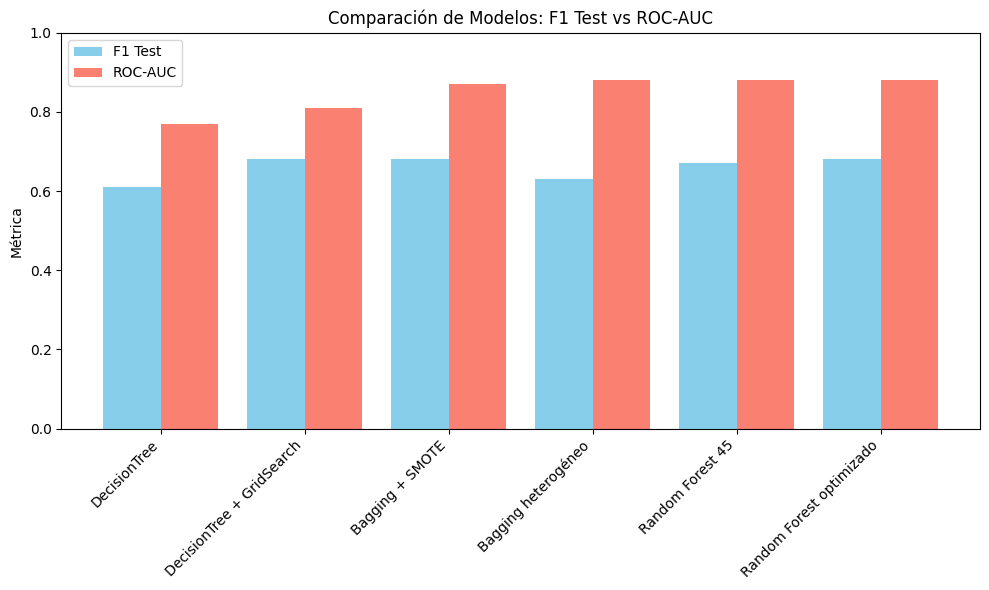

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data = {
    'Modelo': [
        'DecisionTree', 'DecisionTree + GridSearch', 'Bagging + SMOTE',
        'Bagging heterogéneo', 'Random Forest 45', 'Random Forest optimizado'
    ],
    'F1 Test': [0.61, 0.68, 0.68, 0.63, 0.67, 0.68],
    'ROC-AUC': [0.77, 0.81, 0.87, 0.88, 0.88, 0.88]
}

df = pd.DataFrame(data)

# Gráfico de barras lado a lado
plt.figure(figsize=(10,6))
bar_width = 0.4
x = range(len(df))

plt.bar(x, df['F1 Test'], width=bar_width, label='F1 Test', color='skyblue')
plt.bar([i + bar_width for i in x], df['ROC-AUC'], width=bar_width, label='ROC-AUC', color='salmon')

plt.xticks([i + bar_width/2 for i in x], df['Modelo'], rotation=45, ha='right')
plt.ylim(0,1)
plt.ylabel('Métrica')
plt.title('Comparación de Modelos: F1 Test vs ROC-AUC')
plt.legend()
plt.tight_layout()
plt.show()


**Conclusion: The chart clearly shows that optimized and ensemble models (Bagging, Random Forest) achieve higher F1 Test scores (≈0.67–0.68) and superior ROC-AUC (≈0.87–0.88), while single trees have lower values (F1≈0.61, AUC≈0.77).**

**This indicates that regularization and the use of ensemble methods improve both generalization and discriminative ability, justifying the choice of the optimized Random Forest as the final model for churn prediction.**


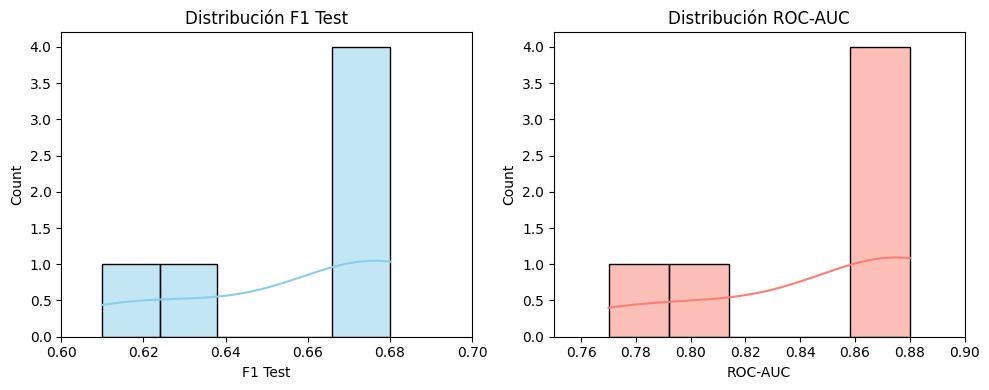

In [17]:
plt.figure(figsize=(10,4))

# F1 Test
plt.subplot(1,2,1)
sns.histplot(df['F1 Test'], bins=5, kde=True, color='skyblue')
plt.title('Distribución F1 Test')
plt.xlabel('F1 Test')
plt.xlim(0.6,0.7)

# ROC-AUC
plt.subplot(1,2,2)
sns.histplot(df['ROC-AUC'], bins=5, kde=True, color='salmon')
plt.title('Distribución ROC-AUC')
plt.xlabel('ROC-AUC')
plt.xlim(0.75,0.9)

plt.tight_layout()
plt.show()


**The histograms show that optimized and ensemble models have F1 Test ≈0.63–0.68 and ROC-AUC ≈0.77–0.88, indicating consistent performance, good generalization, and high discriminative ability, while simple models perform slightly worse.**


## General Final Conclusions

| Stage                   | Model                          | F1 Test | ROC-AUC | Main Conclusion                 |
|-------------------------|--------------------------------|---------|---------|--------------------------------|
| Single tree             | DecisionTree                   | 0.61    | 0.77    | Strong overfitting             |
| Tuned tree              | DecisionTree + GridSearch      | 0.68    | 0.81    | Better balance                 |
| Homogeneous Bagging     | Bagging Trees + SMOTE          | 0.68    | 0.87    | Very good improvement          |
| Heterogeneous Bagging   | Mixed (LR, SVM, DT)           | 0.63    | 0.88    | Robust, but lower F1           |
| Random Forest           | 45 trees                       | 0.67    | 0.88    | Stable and explainable         |
| Optimized Random Forest | GridSearch RF                  | ≈0.67–0.68 | ≈0.88 | Best final model               |

---

### Final Summary

**Best model:** Optimized Random Forest (best_rf)  
**Performance:** F1 ≈ 0.68 | AUC ≈ 0.88  

**Key churn factors:**
- Not renewing the contract  
- Frequent calls to customer service  
- High monthly charges and high minutes usage  

**Executive conclusion:**  
The model predicts churn accurately with high discriminative ability.  
Customers most likely to churn show signs of intensive usage and potential dissatisfaction with costs or service, so retention strategies should focus on improving their experience and offering personalized plans.


In [19]:
# 10. Save model 
joblib.dump(best_rf, "best_rf_churn.joblib")

['best_rf_churn.joblib']